In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from PIL import Image
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Image class
class ImageClass(object) :
    def __init__(self, PATH=''):
        self.PATH = PATH
        self.x_data = []
        self.y_data = []
    def load_dataset(self):
        for img in glob.glob(self.PATH + "NORMAL/*.jpeg") :
            im = cv2.imread(img)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            imarray = np.array(im)
            self.x_data.append(cv2.resize(imarray, dsize=(256,256), interpolation=cv2.INTER_CUBIC))
            self.y_data.append(0)
        for img in glob.glob(self.PATH + "PNEUMONIA/*.jpeg") :
            im = cv2.imread(img)
            im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            imarray = np.array(im)
            self.x_data.append(cv2.resize(imarray, dsize=(256,256), interpolation=cv2.INTER_CUBIC))
            self.y_data.append(1)
        self.x_data = np.array(self.x_data)
        self.y_data = np.array(self.y_data)
        rand = np.random.permutation(len(self.x_data))
        self.x_data = self.x_data[rand]
        self.y_data = self.y_data[rand]

(624, 256, 256)


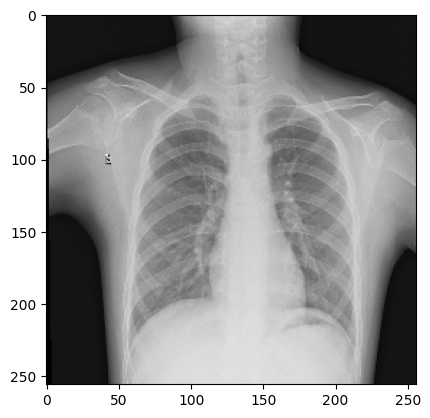

In [4]:
#test
sample = ImageClass("/content/drive/MyDrive/Colab Notebooks/chest_Xray/test/")
sample.load_dataset()
print(sample.x_data.shape)
plt.imshow(sample.x_data[0], cmap='gray')

In [5]:
test = ImageClass("/content/drive/MyDrive/Colab Notebooks/chest_Xray/test/")
train = ImageClass("/content/drive/MyDrive/Colab Notebooks/chest_Xray/train/")
train.load_dataset()
test.load_dataset()
print(train.x_data.shape, train.y_data.shape)
for i in range(0, 10) :
    print(train.y_data[i])

(5216, 256, 256) (5216,)
1
1
1
1
1
1
1
0
1
1


In [6]:
#To categorical
train.y_data = keras.utils.to_categorical(train.y_data, 2)
test.y_data = keras.utils.to_categorical(test.y_data, 2)

In [7]:
for i in range(0, 10) :
    print(train.y_data[i])

[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]


In [8]:
#Reshape data
train.x_data = train.x_data.reshape(train.x_data.shape[0], -1)
test.x_data = test.x_data.reshape(test.x_data.shape[0], -1)

In [9]:
print(train.x_data.shape)

(5216, 65536)


In [10]:
#Normalize Data
train.x_data  = train.x_data  / 255.0
test.x_data  = test.x_data  / 255.0

In [11]:
model = Sequential()
model.add(Dense(units=256, input_shape=(65536,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               16777472  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 2)                 3

In [12]:
batch_size = 50
epochs = 10
history = model.fit(x=train.x_data, y=train.y_data, batch_size=batch_size, epochs=epochs)

Epoch 1/10
105/105 [==============================] - 39s 357ms/step - loss: 1.1597 - accuracy: 0.6990
Epoch 2/10
105/105 [==============================] - 40s 379ms/step - loss: 0.3208 - accuracy: 0.8666
Epoch 3/10
105/105 [==============================] - 36s 345ms/step - loss: 0.2210 - accuracy: 0.9128
Epoch 4/10
105/105 [==============================] - 38s 362ms/step - loss: 0.1917 - accuracy: 0.9256
Epoch 5/10
105/105 [==============================] - 36s 346ms/step - loss: 0.1720 - accuracy: 0.9337
Epoch 6/10
105/105 [==============================] - 38s 365ms/step - loss: 0.1809 - accuracy: 0.9327
Epoch 7/10
105/105 [==============================] - 38s 365ms/step - loss: 0.1807 - accuracy: 0.9302
Epoch 8/10
105/105 [==============================] - 36s 347ms/step - loss: 0.1631 - accuracy: 0.9383
Epoch 9/10
105/105 [==============================] - 38s 366ms/step - loss: 0.1526 - accuracy: 0.9438
Epoch 10/10
105/105 [==============================] - 40s 377ms/step - l

In [13]:
batch_size = 50
epochs = 10
model.fit(x=train.x_data, y=train.y_data, batch_size=batch_size, epochs=epochs)

Epoch 1/10
105/105 [==============================] - 38s 365ms/step - loss: 0.1476 - accuracy: 0.9440
Epoch 2/10
105/105 [==============================] - 43s 408ms/step - loss: 0.1710 - accuracy: 0.9329
Epoch 3/10
105/105 [==============================] - 37s 352ms/step - loss: 0.1689 - accuracy: 0.9346
Epoch 4/10
105/105 [==============================] - 36s 339ms/step - loss: 0.1795 - accuracy: 0.9289
Epoch 5/10
105/105 [==============================] - 37s 353ms/step - loss: 0.1751 - accuracy: 0.9300
Epoch 6/10
105/105 [==============================] - 35s 336ms/step - loss: 0.1573 - accuracy: 0.9396
Epoch 7/10
105/105 [==============================] - 49s 465ms/step - loss: 0.1475 - accuracy: 0.9377
Epoch 8/10
105/105 [==============================] - 36s 347ms/step - loss: 0.1692 - accuracy: 0.9231
Epoch 9/10
105/105 [==============================] - 34s 328ms/step - loss: 0.1820 - accuracy: 0.9149
Epoch 10/10
105/105 [==============================] - 38s 359ms/step - l

In [14]:
save_dir = "/content/drive/MyDrive/Colab Notebooks/models/ann/";
name = "256_128_64_32_16"

In [15]:
#model.save(save_dir + 'ANN_' + name);

In [16]:
test_loss, test_acc = model.evaluate(test.x_data, test.y_data)
print(test_loss, test_acc)

20/20 [==============================] - 2s 75ms/step - loss: 0.4704 - accuracy: 0.7452
0.47044914960861206 0.745192289352417


In [17]:
y_pred = model.predict(test.x_data)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)
print(test.x_data.shape)
print(y_pred.shape)
print(y_pred_classes.shape)
unique_value, count = np.unique(y_pred_classes, return_counts = True)
print(count)
val = unique_value.size
print(val)

20/20 [==============================] - 1s 33ms/step
[[6.0094980e-04 6.9344354e-01]
 [1.1452837e-03 7.2490233e-01]
 [5.7734948e-01 4.7977129e-01]
 ...
 [3.8850676e-02 5.7468557e-01]
 [9.2424893e-01 3.3278185e-01]
 [2.8630007e-02 6.3435239e-01]]
[1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1

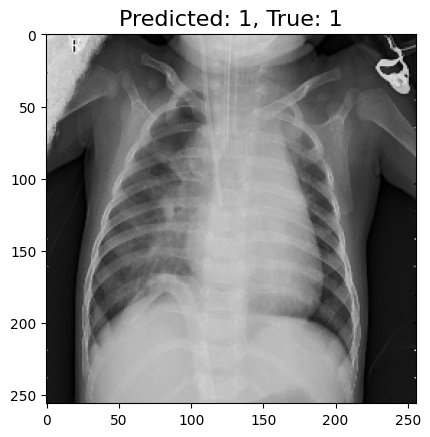

In [18]:
for i in range(0,10) :
    random_idx = np.random.choice(len(test.x_data))
    x_sample = test.x_data[random_idx]
    y_true = np.argmax(test.y_data, axis=1)
    y_sample_true = y_true[random_idx]
    y_sample_pred_class = y_pred_classes[random_idx]
    plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
    plt.imshow(x_sample.reshape(256, 256), cmap='gray')